In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

## Collection Bias Exploration

### recall original preprocessed dataset: 

In [2]:
ovt = pd.read_csv('ovrt.csv')
ovt = ovt.drop(columns=['Unnamed: 0'])
print("Shape: " + str(ovt.shape))
ovt.head()

Shape: (655, 68)


,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,lutein_ovt,cryptox_ovt,lycopene_ovt_x,...,water_ovt,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt_y
0,1245,-32.312500,-20.0,-40.0,-2.0,-12.5,-50.0,-0.1697,-0.0465,0.3556,...,193.992493,-1.905000,8.29750,91.972500,-0.3525,1399.397461,24.567507,54.597500,1790.035065,250.457520
1,1256,-36.687500,-5.0,10.0,-3.0,-50.0,-37.5,0.0980,-0.0966,0.0129,...,722.049988,-5.290000,-6.13250,7.219999,-0.4350,-311.827454,248.392479,15.737500,-347.647522,-1278.749996
2,1265,-6.312500,-5.0,-10.0,2.0,-12.5,0.0,0.0349,-0.1795,-0.4249,...,499.857483,-38.457500,1.31500,34.244999,-1.4150,18381.732422,8353.942706,61.490000,2007.082550,26804.000000
3,1266,0.437500,-10.0,0.0,2.0,25.0,-12.5,-0.1125,-0.1744,-0.4923,...,299.345032,35.095001,-5.08750,26.660002,1.3200,-5628.977448,-1542.992467,312.769993,2945.134918,4928.824951
4,1276,30.646484,30.0,5.0,-1.0,25.0,37.5,0.0766,0.0213,-0.0547,...,51.471191,4.437499,-1.35375,-67.597503,0.7600,49091.856445,28144.247949,284.864999,92.692444,-1542.129974


### all patients in the study (according to endpoint)

In [3]:
endpoints_df = pd.read_excel("C:/Users/leena/Niema_ML/data/endpoints.xls")
endpoints_df.head()

,id,intgrp,vitality,brcastatus,othcstatus,brcacontribute,Year_Dx,grade,grade2,grade3,grademiss,newstage,stage2,stage3,site0,recur_flag,yrsdx_rand,yrsrand_endr,yrsdx_endr,yrsdx_endd
0,1002,3,1,0,0.0,-1,1994,0,0,0,1,2,1,0,1,0,0.761123,11.195072,11.956194,11.956194
1,1003,3,1,0,0.0,-1,1994,2,1,0,0,1,0,0,1,0,1.596167,10.784394,12.380561,12.380561
2,1005,4,1,0,0.0,-1,1991,0,0,0,1,2,1,0,1,0,4.010951,10.995209,15.006160,15.006160
3,1007,3,1,0,0.0,-1,1994,1,0,0,0,2,1,0,1,0,0.950034,10.995209,11.945243,11.945243
4,1008,4,1,0,0.0,-1,1994,2,1,0,0,1,0,0,1,0,0.446270,7.786448,8.232717,8.232717


### storing patient ids onto lists 

In [4]:
# patient ids in ovt --> in Year 1 and Year 4
ovt_ids = list(ovt.get('ID'))

# all patient ids 
all_ids = list(endpoints_df.get('id'))

# patients lost 
lost_ids = [i for i in all_ids if i not in ovt_ids]

# sanity checks 
print(len(lost_ids) == (len(all_ids) - len(ovt_ids)))
print(ovt_ids[5] in lost_ids)

True
False


## Reading and Splitting Datasets by Lost/Kept Ids

### baseline 

In [5]:
def baseline_path(filename):
    return "C:/Users/leena/Niema_ML/data/Baseline-Data/" + filename

In [6]:
#demographics 
base_demo = pd.read_excel(baseline_path("demographics.xls"))

#medial/clinic measurements
base_measure = pd.read_excel(baseline_path("Medical.xls"))

#food from nds
base_foodnds = pd.read_excel(baseline_path("NDSDIET.xls"))

#supplements
base_supplements = pd.read_excel(baseline_path("Nsupps.xls"))

#thoughts and feelings
base_feelings = pd.read_excel(baseline_path("TFbase.xls"))

#personal habits
base_habits = pd.read_excel(baseline_path("phbase.xls"))

#lifestyle questionaire
base_lifestyle = pd.read_excel(baseline_path("LIFESTYLE.xls"))

#health status
base_health_status = pd.read_excel(baseline_path("Health_Status.xls"))

#family history
base_family = pd.read_excel(baseline_path("FAMHX.xls"))

#reproductive history
base_reproductive = pd.read_excel(baseline_path("REPROHX.xls"))

#food frequency questionaire 
base_foodfreq = pd.read_excel(baseline_path("ffq0.xls"))

#blood carotenoids
base_bloodcaro = pd.read_excel(baseline_path("carot0.xls"))

## Demographics

In [7]:
base_demo.head()

,ID,age at dx,age at rand,Ethnicity,Education,Marital Status,Empl. Status,Yr Rand
0,1002,38,39,1,5,2,1,1995
1,1003,51,53,1,8,2,1,1995
2,1005,50,54,3,5,2,1,1995
3,1007,53,54,1,9,2,1,1995
4,1008,47,48,1,7,2,0,1995


In [8]:
base_lost = pd.DataFrame({'id':lost_ids}).merge(base_demo, left_on = 'id',right_on = 'ID')
base_kept = pd.DataFrame({'id': ovt_ids}).merge(base_demo, left_on = 'id',right_on = 'ID')

In [9]:
print('Lost Patients')
base_lost.head()

Lost Patients


,id,ID,age at dx,age at rand,Ethnicity,Education,Marital Status,Empl. Status,Yr Rand
0,1002,1002,38,39,1,5,2,1,1995
1,1003,1003,51,53,1,8,2,1,1995
2,1005,1005,50,54,3,5,2,1,1995
3,1007,1007,53,54,1,9,2,1,1995
4,1008,1008,47,48,1,7,2,0,1995


In [10]:
print('Kept Patients')
base_kept.head()

Kept Patients


,id,ID,age at dx,age at rand,Ethnicity,Education,Marital Status,Empl. Status,Yr Rand
0,1245,1245,64,64,1,8,2,0,1998
1,1256,1256,48,49,3,8,2,0,1998
2,1265,1265,64,65,1,7,2,1,1998
3,1266,1266,35,37,1,7,1,1,1998
4,1276,1276,47,48,1,7,2,1,1998


In [11]:
base_lost.columns

Index(['id', 'ID', 'age at dx', 'age at rand', 'Ethnicity', 'Education',
       'Marital Status', 'Empl. Status', 'Yr Rand'],
      dtype='object')

### comparing distributions for each column

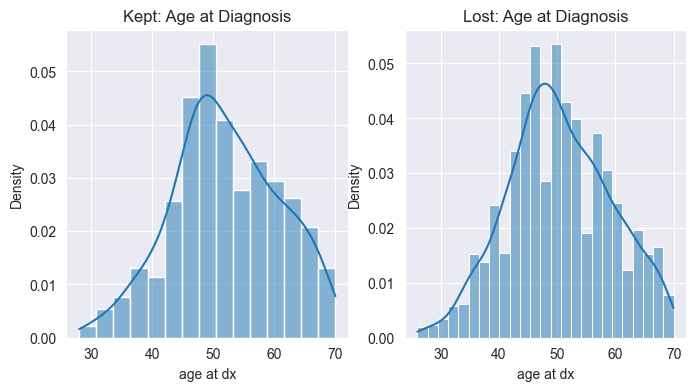

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.histplot(data=base_kept, x='age at dx', stat='density', kde=True)
plt.title('Kept: Age at Diagnosis')

plt.subplot(1,2,2)
sns.histplot(data=base_lost, x='age at dx', stat='density', kde=True)
plt.title('Lost: Age at Diagnosis')

plt.show()

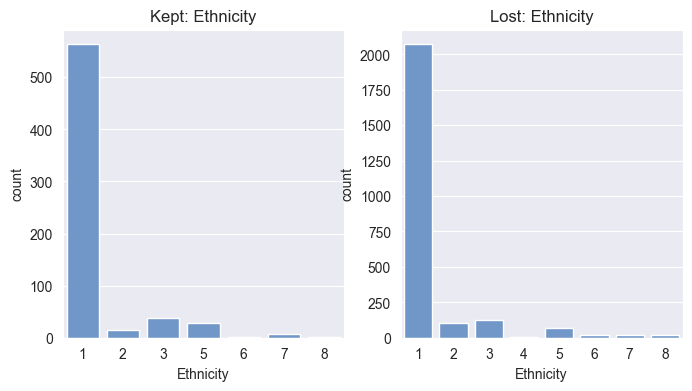

In [13]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.countplot(data=base_kept, x='Ethnicity', color='#6395d6')
plt.title('Kept: Ethnicity')

plt.subplot(1,2,2)
sns.countplot(data=base_lost, x='Ethnicity', color='#6395d6')
plt.title('Lost: Ethnicity')

plt.show()

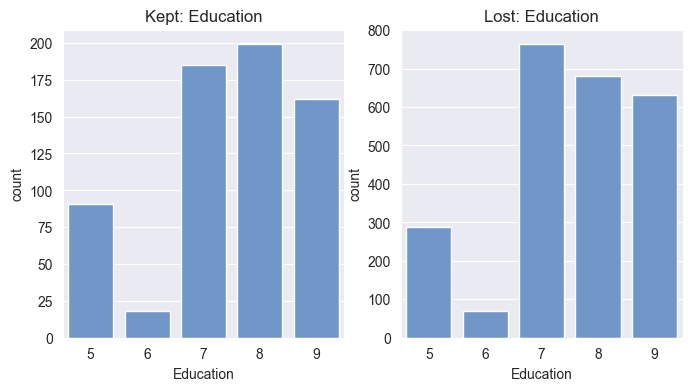

In [14]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.countplot(data=base_kept, x='Education', color='#6395d6')
plt.title('Kept: Education')

plt.subplot(1,2,2)
sns.countplot(data=base_lost, x='Education', color='#6395d6')
plt.title('Lost: Education')

plt.show()

## Clinical Measurements

In [15]:
base_measure.head()

,ID,Lump/Mast,Radiation,Chemo,Tumor Type,Estr Recep,Prog Recep,Node Exam,Node Pos,Stage,...,Weight,BMI,Waist,Hip,Pulse,Bld Pres -Sys,Bld Pres - Dias,Menopause,Anti-Estr Use,Anti-Estro Type
0,1002,1,2,2,3,1,1,18,1.0,II,...,65.50,23.0697,70.6,94.5,-9,-9,-9,1,1,1
1,1003,1,2,2,3,1,1,14,0.0,I,...,60.00,23.4375,87.0,94.0,-9,-9,-9,2,1,1
2,1005,2,1,1,3,3,3,29,0.0,II,...,68.63,32.4181,92.0,110.0,-9,-9,-9,2,3,1
3,1007,2,1,2,4,0,0,21,1.0,II,...,55.45,23.3808,70.0,99.0,-9,-9,-9,2,1,1
4,1008,2,1,1,3,1,1,16,0.0,I,...,64.40,25.4737,75.6,100.0,-9,-9,-9,2,1,1


In [16]:
measure_lost = pd.DataFrame({'id':lost_ids}).merge(base_measure, left_on = 'id',right_on = 'ID')
measure_kept = pd.DataFrame({'id': ovt_ids}).merge(base_measure, left_on = 'id',right_on = 'ID')

print('Lost Patients: ')
measure_lost.head()

Lost Patients: 


,id,ID,Lump/Mast,Radiation,Chemo,Tumor Type,Estr Recep,Prog Recep,Node Exam,Node Pos,...,Weight,BMI,Waist,Hip,Pulse,Bld Pres -Sys,Bld Pres - Dias,Menopause,Anti-Estr Use,Anti-Estro Type
0,1002,1002,1,2,2,3,1,1,18,1.0,...,65.50,23.0697,70.6,94.5,-9,-9,-9,1,1,1
1,1003,1003,1,2,2,3,1,1,14,0.0,...,60.00,23.4375,87.0,94.0,-9,-9,-9,2,1,1
2,1005,1005,2,1,1,3,3,3,29,0.0,...,68.63,32.4181,92.0,110.0,-9,-9,-9,2,3,1
3,1007,1007,2,1,2,4,0,0,21,1.0,...,55.45,23.3808,70.0,99.0,-9,-9,-9,2,1,1
4,1008,1008,2,1,1,3,1,1,16,0.0,...,64.40,25.4737,75.6,100.0,-9,-9,-9,2,1,1


In [17]:
print('Kept Patients:') 
measure_kept.head()

Kept Patients:


,id,ID,Lump/Mast,Radiation,Chemo,Tumor Type,Estr Recep,Prog Recep,Node Exam,Node Pos,...,Weight,BMI,Waist,Hip,Pulse,Bld Pres -Sys,Bld Pres - Dias,Menopause,Anti-Estr Use,Anti-Estro Type
0,1245,1245,1,2,1,3,1,1,12,0.0,...,61.6,24.3661,74.30,99.5,32,135,66,2,1,1
1,1256,1256,1,2,1,3,1,1,7,0.0,...,80.5,28.7954,99.30,107.5,38,99,60,2,1,1
2,1265,1265,1,2,1,2,1,1,15,0.0,...,71.0,24.2243,77.00,104.8,27,172,91,2,1,1
3,1266,1266,2,1,2,3,0,0,27,2.0,...,68.2,22.5261,71.60,99.5,26,123,78,2,2,4
4,1276,1276,2,1,1,3,1,1,10,0.0,...,57.4,22.5344,69.05,99.8,28,104,59,1,1,7


## Health Status

In [18]:
base_health_status.head(10)

,ID,hospital_,Exam_Freq,Proph_Mast,Blood_Sugar,Cardiovascular,Digestive,Arthritis,Osteoporosis,Misc_Cond,Blood_Sugar_Meds,Cardio_Meds,Gastro_Meds,Corticosteroids_
0,13245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13244,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13243,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13241,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,13240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,13239,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7,13238,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,13237,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,13236,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
health_lost = pd.DataFrame({'id':lost_ids}).merge(base_health_status, left_on = 'id',right_on = 'ID')
health_kept = pd.DataFrame({'id': ovt_ids}).merge(base_health_status, left_on = 'id',right_on = 'ID')

In [20]:
print('Lost Patients:')
health_lost.head(10)

Lost Patients:


,id,ID,hospital_,Exam_Freq,Proph_Mast,Blood_Sugar,Cardiovascular,Digestive,Arthritis,Osteoporosis,Misc_Cond,Blood_Sugar_Meds,Cardio_Meds,Gastro_Meds,Corticosteroids_
0,1002,1002,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003,1003,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1005,1005,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007,1007,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1008,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1009,1009,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1010,1010,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1011,1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1012,1012,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1015,1015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print('Kept: Patients:')
health_kept.head(10)

Kept: Patients:


,id,ID,hospital_,Exam_Freq,Proph_Mast,Blood_Sugar,Cardiovascular,Digestive,Arthritis,Osteoporosis,Misc_Cond,Blood_Sugar_Meds,Cardio_Meds,Gastro_Meds,Corticosteroids_
0,1245,1245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1256,1256,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1265,1265,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1266,1266,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1276,1276,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1277,1277,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1281,1281,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1287,1287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1288,1288,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1289,1289,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Food from NDS

In [22]:
base_foodnds.head()

,ID,Recalls,last date,Kcal,Protein(g,Total Fat,Total Carb,Alcohol,% Protein,% Fat,...,Legume,Soy Legume,Citrus,Berry,Melon,Other Fruit,FJ,Fruit_noJ,Whole Grain,Refined Grain
0,1002,4.0,1994-12-16,1373,55,35.2,218,0,15.598059,22.828404,...,0.28,0,0,0.08,0,1.8,0.95,1.88,0.98,1.53
1,1003,4.0,1995-01-23,1693,63.6,41.1,259,12.6,14.619717,21.023402,...,0.75,0.33,1.9,0,0,1.5,0.53,3.4,3.35,1.95
2,1005,4.0,1995-02-06,1355,49.7,45.3,195,0,14.655364,29.549443,...,0,0,0.7,0,0.2,1.53,0.88,2.43,0.6,1.73
3,1007,4.0,1995-01-26,1110,60.3,32,143,2.6,21.624958,26.037579,...,0,0,0.45,0,0,0.05,1.3,0.5,0.43,2.45
4,1008,4.0,1995-01-23,1503,63.2,61.3,176,2.7,17.356841,37.52792,...,0.33,0,0.28,0,0,1.78,0,2.05,0.6,2.88


In [23]:
food_lost = pd.DataFrame({'id':lost_ids}).merge(base_foodnds, left_on = 'id',right_on = 'ID')
food_kept = pd.DataFrame({'id': ovt_ids}).merge(base_foodnds, left_on = 'id',right_on = 'ID')

In [24]:
print('Lost Patients:')
food_lost.head()

Lost Patients:


,id,ID,Recalls,last date,Kcal,Protein(g,Total Fat,Total Carb,Alcohol,% Protein,...,Legume,Soy Legume,Citrus,Berry,Melon,Other Fruit,FJ,Fruit_noJ,Whole Grain,Refined Grain
0,1002,1002,4.0,1994-12-16,1373,55,35.2,218,0,15.598059,...,0.28,0,0,0.08,0,1.8,0.95,1.88,0.98,1.53
1,1003,1003,4.0,1995-01-23,1693,63.6,41.1,259,12.6,14.619717,...,0.75,0.33,1.9,0,0,1.5,0.53,3.4,3.35,1.95
2,1005,1005,4.0,1995-02-06,1355,49.7,45.3,195,0,14.655364,...,0,0,0.7,0,0.2,1.53,0.88,2.43,0.6,1.73
3,1007,1007,4.0,1995-01-26,1110,60.3,32,143,2.6,21.624958,...,0,0,0.45,0,0,0.05,1.3,0.5,0.43,2.45
4,1008,1008,4.0,1995-01-23,1503,63.2,61.3,176,2.7,17.356841,...,0.33,0,0.28,0,0,1.78,0,2.05,0.6,2.88


In [25]:
print('Kept Patients:')
food_kept.head()

Kept Patients:


,id,ID,Recalls,last date,Kcal,Protein(g,Total Fat,Total Carb,Alcohol,% Protein,...,Legume,Soy Legume,Citrus,Berry,Melon,Other Fruit,FJ,Fruit_noJ,Whole Grain,Refined Grain
0,1245,1245,4.0,1998-02-19,1293,57.9,22.8,223,0.8,17.886341,...,0.08,0,1.6,0,0.58,1.5,0,3.68,1.25,2.85
1,1256,1256,4.0,1998-03-19,1205,64.7,28.8,175,0,22.136304,...,0,0,0,0,0,0.8,1.55,0.8,0.68,2.78
2,1265,1265,4.0,1998-04-18,2277,105.4,76.7,305,0,18.731263,...,0.13,0.08,0.25,1.25,0.73,1.14,0,3.36,2.03,2.05
3,1266,1266,4.0,1998-04-08,1828,54.7,55.2,294,0,12.050132,...,0.3,0,0,0.95,0,1.8,0.7,2.75,2.5,1.38
4,1276,1276,4.0,1998-04-07,1624,94.2,54.9,193,3.7,23.204818,...,0,0.28,0.45,0.93,2.3,1.15,0.93,4.82,0.7,1.58


## Lifestyle

In [26]:
base_lifestyle.head()

,ID,main meals,snacks,meals out,cooking time,adults,children,I cook?,cooking help,I clean up?,...,time at max wgt,health insurance,insurance change?,insurance satisfaction,years in state,where born,age15 residence,age35 residence,age50 residence,longest residence
0,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN
1,1003,21.0,21.0,6.0,75.0,2.0,0.0,1.0,1.0,1.0,...,0.5,4.0,1.0,9.0,4.0,3,1.0,1.0,1.0,1
2,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN


In [27]:
lifestyle_lost = pd.DataFrame({'id':lost_ids}).merge(base_lifestyle, left_on = 'id',right_on = 'ID')
lifestyle_kept = pd.DataFrame({'id': ovt_ids}).merge(base_lifestyle, left_on = 'id',right_on = 'ID')

In [28]:
print('Lost Patients:')
lifestyle_lost.head()

Lost Patients:


,id,ID,main meals,snacks,meals out,cooking time,adults,children,I cook?,cooking help,...,time at max wgt,health insurance,insurance change?,insurance satisfaction,years in state,where born,age15 residence,age35 residence,age50 residence,longest residence
0,1002,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN
1,1003,1003,21.0,21.0,6.0,75.0,2.0,0.0,1.0,1.0,...,0.5,4.0,1.0,9.0,4.0,3,1.0,1.0,1.0,1
2,1005,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1008,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN


In [29]:
print('Kept Patients:')
lifestyle_kept.head()

Kept Patients:


,id,ID,main meals,snacks,meals out,cooking time,adults,children,I cook?,cooking help,...,time at max wgt,health insurance,insurance change?,insurance satisfaction,years in state,where born,age15 residence,age35 residence,age50 residence,longest residence
0,1245,1245,21.0,13.0,4.0,75.0,2.0,0.0,1.0,1.0,...,5.0,4.0,1.0,9.0,4.0,4,4.0,1.0,1.0,1
1,1256,1256,21.0,6.0,3.0,15.0,4.0,NaN,1.0,1.0,...,1.0,4.0,1.0,9.0,3.0,9,9.0,9.0,99.0,9
2,1265,1265,21.0,11.0,3.0,55.0,2.0,0.0,1.0,1.0,...,0.2,4.0,1.0,9.0,4.0,3,3.0,3.0,1.0,3
3,1266,1266,15.0,6.0,5.0,60.0,2.0,0.0,1.0,1.0,...,2.2,4.0,1.0,9.0,4.0,2,1.0,1.0,99.0,1
4,1276,1276,16.0,12.0,8.0,90.0,2.0,1.0,1.0,1.0,...,27.0,4.0,1.0,9.0,4.0,3,1.0,1.0,99.0,1


## Endpoints

In [36]:
endpoints_df.head()
# removing one row with unknown vitality status 
ep = endpoints_df[endpoints_df['vitality'] != 2]
ep.head()

,id,intgrp,vitality,brcastatus,othcstatus,brcacontribute,Year_Dx,grade,grade2,grade3,grademiss,newstage,stage2,stage3,site0,recur_flag,yrsdx_rand,yrsrand_endr,yrsdx_endr,yrsdx_endd
0,1002,3,1,0,0.0,-1,1994,0,0,0,1,2,1,0,1,0,0.761123,11.195072,11.956194,11.956194
1,1003,3,1,0,0.0,-1,1994,2,1,0,0,1,0,0,1,0,1.596167,10.784394,12.380561,12.380561
2,1005,4,1,0,0.0,-1,1991,0,0,0,1,2,1,0,1,0,4.010951,10.995209,15.006160,15.006160
3,1007,3,1,0,0.0,-1,1994,1,0,0,0,2,1,0,1,0,0.950034,10.995209,11.945243,11.945243
4,1008,4,1,0,0.0,-1,1994,2,1,0,0,1,0,0,1,0,0.446270,7.786448,8.232717,8.232717


In [37]:
ep_lost = pd.DataFrame({'id':lost_ids}).merge(ep, left_on = 'id',right_on = 'id')
ep_kept = pd.DataFrame({'id': ovt_ids}).merge(ep, left_on = 'id',right_on = 'id')

### vitality status 

0 - Dead  
1 - Alive 


In [72]:
vitality_lost = ep_lost.get(['id', 'vitality'])
vitality_kept = ep_kept.get(['id', 'vitality'])

In [77]:
vitality_lost.groupby(['vitality']).count().get('id').iloc[1]

2129

In [39]:
vitality_lost['vitality'].value_counts()

1    2129
0     303
Name: vitality, dtype: int64

In [40]:
vitality_kept['vitality'].value_counts()

1    643
0     12
Name: vitality, dtype: int64

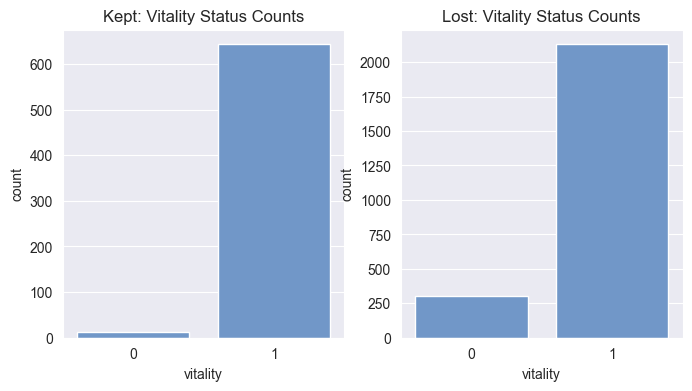

In [43]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.countplot(data=vitality_kept, x='vitality', color='#6395d6')
plt.title('Kept: Vitality Status Counts')

plt.subplot(1,2,2)
sns.countplot(data=vitality_lost, x='vitality', color='#6395d6')
plt.title('Lost: Vitality Status Counts')

plt.show()

In [59]:
# plotting relative frequency 
def rel_freq_lost(count):
    return count/vitality_lost.shape[0]

def rel_freq_kept(count):
    return count/vitality_kept.shape[0]
    

vitality_lost_count = pd.DataFrame(vitality_lost['vitality'].value_counts())
vitality_lost_count = vitality_lost_count.assign(status=['alive', 'dead']).set_index('status').reset_index()
vitality_lost_count = vitality_lost_count.assign(proportion=vitality_lost_count['vitality'].apply(rel_freq_lost))

vitality_kept_count = pd.DataFrame(vitality_kept['vitality'].value_counts())
vitality_kept_count = vitality_kept_count.assign(status=['alive', 'dead']).set_index('status').reset_index()
vitality_kept_count = vitality_kept_count.assign(proportion=vitality_kept_count['vitality'].apply(rel_freq_kept))

In [80]:
# sanity check - passed! 
    # alive_prop = vitality_lost.groupby(['vitality']).count().get('id').iloc[1] / vitality_lost.shape[0]
    # dead_prop =  vitality_lost.groupby(['vitality']).count().get('id').iloc[0] / vitality_lost.shape[0]
    # print(alive_prop)
    # print(dead_prop)

print('LOST Patients')
vitality_lost_count

LOST Patients


,status,vitality,proportion
0,alive,2129,0.875411
1,dead,303,0.124589


In [83]:
# sanity check - passed!
    # alive_prop = vitality_kept.groupby(['vitality']).count().get('id').iloc[1] / vitality_kept.shape[0]
    # dead_prop =  vitality_kept.groupby(['vitality']).count().get('id').iloc[0] / vitality_kept.shape[0]
    # print(alive_prop)
    # print(dead_prop)

print('KEPT Patients')
vitality_kept_count

KEPT Patients


,status,vitality,proportion
0,alive,643,0.981679
1,dead,12,0.018321


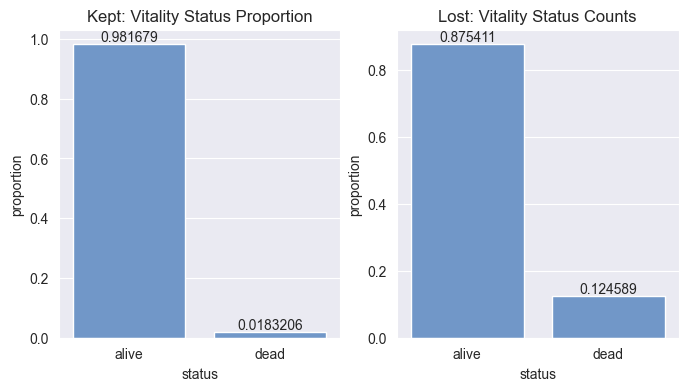

In [88]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
ax = sns.barplot(x='status', y='proportion', color='#6395d6', data=vitality_kept_count)
ax.bar_label(ax.containers[0])
plt.title('Kept: Vitality Status Proportion')

plt.subplot(1,2,2)
ax = sns.barplot(x='status', y='proportion', color='#6395d6', data=vitality_lost_count)
ax.bar_label(ax.containers[0])
plt.title('Lost: Vitality Status Counts')

plt.show()